# Data Set: OSMI Mental Health in Tech Survey 2016

### **Description:**

In 2016, OSMI, or Open Sourcing Mental Illness, conducted a survey in 2016, in which 1433 participants were asked 63 questions in order to evaluate attitudes toward mental health and the frequency of mental health disorders in the tech industry. The data set has one row for each participants' response and columns representing questions, with some notable ones including: 
- Does your employer offer resources to learn more about mental health concerns and options for seeking help?
- Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?
- Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?

Link to survey data: https://www.kaggle.com/datasets/osmi/mental-health-in-tech-2016

### **Part 1: Setting up the Dataframe**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
from sklearn import linear_model
import statsmodels.api as sm
import statsmodels.formula.api as smf
import plotly.express as px
from statsmodels.iolib.summary2 import summary_col

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('osmi_mh_2016.csv')
df.head()

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you know local or online resources to seek help for a mental health disorder?,"If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?","If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?","If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?","If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?",Do you believe your productivity is ever affected by a mental health issue?,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",Do you have previous employers?,Have your previous employers provided mental health benefits?,Were you aware of the options for mental health care provided by your previous employers?,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health issues and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Do you think that discussing a mental health disorder with previous employers would have negative consequences?,Do you think that discussing a physical health issue with previous employers would have negative consequences?,Would you have been willing to discuss a mental health issue with your previous co-workers?,Would you have been willing to discuss a mental health issue with your direct supervisor(s)?,Did you feel that your previous employers took mental health as seriously as physical health?,Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Why or why not?,Would you bring up a mental health issue with a potential employer in an interview?,Why or why not?.1,Do you feel that being identified as a person with a mental health issue would hurt your career?,Do you think that team members/co-workers would view you more negatively if they knew you suffered from a menta

In [5]:
df.shape

# 1433 respondents, 63 questions asked

(1433, 63)

### **Part 2: Cleaning Data**

In [6]:
# renaming the columns in order to save space

df.columns = ['self_empl','employee_num','tech','tech_role','mh_cov_benefits', 'mh_cov_awareness', 'mh_discuss_employ',\
         'mh_resources_employ','mh_anon','mh_medical_leave','mh_conseq','phys_conseq','mh_discuss_cowork','mh_discuss_super',\
         'mh_sameas_phys','mh_conseq_cowork','coverage_with_mh','mh_resources_awareness','mh_reveal_clients','mh_reveal_clients_conseq',\
         'mh_reveal_cowork','mh_reveal_cowork_conseq','mh_prod','mh_prod_percent','prev_employ','prev__mh_benefits','prev__mh_awareness',\
         'prev_discuss_mh','prev_mh_resources','prev_mh_anon','prev_mh_conseq','prev_phys_conseq','prev_mh_discuss_cowork','prev_mh_discuss_super',\
         'prev_mh_sameas_phys','prev_mh_conseq_cowork','ph_inter','why/why_not','mh_inter','why/why_not1','mh_hurt_career','neg_view_if_mh',\
         'share_mh_fnf','bad_resp_mh','share_mh_if_cowork_share','mh_fam_history','past_mh_disord','current_mh_disord','if_yes_condition','if_maybe_condition',\
         'mh_diagnos','mh_condition','sought_mh_treat','mh_eff_treat_work','mh_eff_not_treat_work','age','gender','country_live','state','country_work',\
         'territory','role','work_remote']

In [7]:
# check the total amount of null values per column
df.isna().sum()

self_empl             0
employee_num        287
tech                287
tech_role          1170
mh_cov_benefits     287
                   ... 
state               593
country_work          0
territory           582
role                  0
work_remote           0
Length: 63, dtype: int64

In [8]:
# 1433 respondents, 63 questions
df.shape

(1433, 63)

In [9]:
# delete columns with more than 50% missing data
thresh_50Percent = len(df)/2
thresh_50Percent

716.5

In [10]:
df.dropna(thresh=thresh_50Percent, axis=1, inplace=True)

In [11]:
# compare this to the previous df.isna().sum() above
df.isna().sum()

self_empl                   0
employee_num              287
tech                      287
mh_cov_benefits           287
mh_cov_awareness          420
mh_discuss_employ         287
mh_resources_employ       287
mh_anon                   287
mh_medical_leave          287
mh_conseq                 287
phys_conseq               287
mh_discuss_cowork         287
mh_discuss_super          287
mh_sameas_phys            287
mh_conseq_cowork          287
prev_employ                 0
prev__mh_benefits         169
prev__mh_awareness        169
prev_discuss_mh           169
prev_mh_resources         169
prev_mh_anon              169
prev_mh_conseq            169
prev_phys_conseq          169
prev_mh_discuss_cowork    169
prev_mh_discuss_super     169
prev_mh_sameas_phys       169
prev_mh_conseq_cowork     169
ph_inter                    0
why/why_not               338
mh_inter                    0
why/why_not1              307
mh_hurt_career              0
neg_view_if_mh              0
share_mh_f

In [12]:
# reduced number of columns from 63 to 50
df.shape

(1433, 50)

In [13]:
# replace NaN values with "Unknown"
df.fillna(value="Unknown",inplace=True)

In [14]:
# check to see if there are any more NaN values
df.isna().sum().sum()

0

In [15]:
len(df[df.tech == 0.00])

263

In [16]:
# get rid of anyone who does not work in the tech industry
df = df[df.tech != 0.00]
df.head()

,self_empl,employee_num,tech,mh_cov_benefits,mh_cov_awareness,mh_discuss_employ,mh_resources_employ,mh_anon,mh_medical_leave,mh_conseq,phys_conseq,mh_discuss_cowork,mh_discuss_super,mh_sameas_phys,mh_conseq_cowork,prev_employ,prev__mh_benefits,prev__mh_awareness,prev_discuss_mh,prev_mh_resources,prev_mh_anon,prev_mh_conseq,prev_phys_conseq,prev_mh_discuss_cowork,prev_mh_discuss_super,prev_mh_sameas_phys,prev_mh_conseq_cowork,ph_inter,why/why_not,mh_inter,why/why_not1,mh_hurt_career,neg_view_if_mh,share_mh_fnf,bad_resp_mh,mh_fam_history,past_mh_disord,current_mh_disord,mh_diagnos,sought_mh_treat,mh_eff_treat_work,mh_eff_not_treat_work,age,gender,country_live,state,country_work,territory,role,work_remote
0,0,26-100,1.00,Not eligible for coverage / N/A,Unknown,No,No,I don't know,Very easy,No,No,Maybe,Yes,I don't know,No,1,"No, none did",N/A (not currently aware),I don't know,None did,I don't know,Some of them,None of them,Some of my previous employers,Some of my previous employers,I don't know,None of them,Maybe,Unknown,Maybe,Unknown,Maybe,"No, I don't think they would",Somewhat open,No,No,Yes,No,Yes,0,Not applicable to me,Not applicable to me,39,Male,United Kingdom,Unknown,United Kingdom,Unknown,Back-end Developer,Sometimes
1,0,6-25,1.00,No,Yes,Yes,Yes,Yes,Somewhat easy,No,No,Maybe,Yes,Yes,No,1,"Yes, they all did",I was aware of some,None did,Some did,"Yes, always",None of them,None of them,"No, at none of my previous employers",Some of my previous employers,Some did,None of them,Maybe,It would depend on the health issue. If there ...,No,While mental health has become a more prominen...,"No, I don't think it would","No, I don't think they would",Somewhat open,No,Yes,Yes,Yes,Yes,1,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.00,No,Unknown,No,No,I don't know,Neither easy nor difficult,Maybe,No,Maybe,Maybe,I don't know,No,1,"No, none did",N/A (not currently aware),None did,Some did,I don't know,I don't know,Some of them,Some of my previous employers,I don't know,I don't know,Some of them,Yes,"They would provable need to know, to Judge if ...",Yes,"Stigma, mainly.",Maybe,Maybe,Somewhat open,Maybe/Not sure,No,Maybe,No,No,1,Not applicable to me,Not applicable to me,38,Male,United Kingdom,Unknown,United Kingdom,Unknown,Back-end Developer,Always
3,1,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,1,Some did,N/A (not currently aware),None did,None did,I don't know,Some of them,Some of them,Some of my previous employers,Some of my previous employers,I don't know,Some of them,Yes,"old back injury, doesn't cause me many issues ...",Maybe,would not if I was not 100% sure that the disc...,"Yes, I think it would",Maybe,Neutral,No,No,Yes,Yes,Yes,1,Sometimes,Sometimes,43,male,United Kingdom,Unknown,United Kingdom,Unknown,Supervisor/Team Lead,Sometimes
5,0,More than 1000,1.00,Yes,I am not sure,No,Yes,Yes,Somewhat easy,Yes,Yes,Maybe,Yes,No,Yes,1,"No, none did","Yes, I was aware of all of them",None did,None did,I don't know,"Yes, all of them",Some of them,"No, at none of my previous employers","No, at none of my previous employers",None did,Some of them,Yes,If it would potentially affect my ability to d...,Maybe,It would depend on the field & what I knew of ...,"Yes, I think it would",Maybe,Somewhat open,"Yes, I experienced",No,No,Yes,No,1,Not applicable to me,Often,42,Male,United Kingdom,Unknown,United Kingdom,Unknown,DevOps/SysAdmin|Support|Back-end Developer|Fro...,Sometimes


In [17]:
# got rid of the tech column for df since we solely want to focus on mental health for people in tech industry
df.drop('tech', axis=1, inplace=True)
df.head()

,self_empl,employee_num,mh_cov_benefits,mh_cov_awareness,mh_discuss_employ,mh_resources_employ,mh_anon,mh_medical_leave,mh_conseq,phys_conseq,mh_discuss_cowork,mh_discuss_super,mh_sameas_phys,mh_conseq_cowork,prev_employ,prev__mh_benefits,prev__mh_awareness,prev_discuss_mh,prev_mh_resources,prev_mh_anon,prev_mh_conseq,prev_phys_conseq,prev_mh_discuss_cowork,prev_mh_discuss_super,prev_mh_sameas_phys,prev_mh_conseq_cowork,ph_inter,why/why_not,mh_inter,why/why_not1,mh_hurt_career,neg_view_if_mh,share_mh_fnf,bad_resp_mh,mh_fam_history,past_mh_disord,current_mh_disord,mh_diagnos,sought_mh_treat,mh_eff_treat_work,mh_eff_not_treat_work,age,gender,country_live,state,country_work,territory,role,work_remote
0,0,26-100,Not eligible for coverage / N/A,Unknown,No,No,I don't know,Very easy,No,No,Maybe,Yes,I don't know,No,1,"No, none did",N/A (not currently aware),I don't know,None did,I don't know,Some of them,None of them,Some of my previous employers,Some of my previous employers,I don't know,None of them,Maybe,Unknown,Maybe,Unknown,Maybe,"No, I don't think they would",Somewhat open,No,No,Yes,No,Yes,0,Not applicable to me,Not applicable to me,39,Male,United Kingdom,Unknown,United Kingdom,Unknown,Back-end Developer,Sometimes
1,0,6-25,No,Yes,Yes,Yes,Yes,Somewhat easy,No,No,Maybe,Yes,Yes,No,1,"Yes, they all did",I was aware of some,None did,Some did,"Yes, always",None of them,None of them,"No, at none of my previous employers",Some of my previous employers,Some did,None of them,Maybe,It would depend on the health issue. If there ...,No,While mental health has become a more prominen...,"No, I don't think it would","No, I don't think they would",Somewhat open,No,Yes,Yes,Yes,Yes,1,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,No,Unknown,No,No,I don't know,Neither easy nor difficult,Maybe,No,Maybe,Maybe,I don't know,No,1,"No, none did",N/A (not currently aware),None did,Some did,I don't know,I don't know,Some of them,Some of my previous employers,I don't know,I don't know,Some of them,Yes,"They would provable need to know, to Judge if ...",Yes,"Stigma, mainly.",Maybe,Maybe,Somewhat open,Maybe/Not sure,No,Maybe,No,No,1,Not applicable to me,Not applicable to me,38,Male,United Kingdom,Unknown,United Kingdom,Unknown,Back-end Developer,Always
3,1,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,1,Some did,N/A (not currently aware),None did,None did,I don't know,Some of them,Some of them,Some of my previous employers,Some of my previous employers,I don't know,Some of them,Yes,"old back injury, doesn't cause me many issues ...",Maybe,would not if I was not 100% sure that the disc...,"Yes, I think it would",Maybe,Neutral,No,No,Yes,Yes,Yes,1,Sometimes,Sometimes,43,male,United Kingdom,Unknown,United Kingdom,Unknown,Supervisor/Team Lead,Sometimes
5,0,More than 1000,Yes,I am not sure,No,Yes,Yes,Somewhat easy,Yes,Yes,Maybe,Yes,No,Yes,1,"No, none did","Yes, I was aware of all of them",None did,None did,I don't know,"Yes, all of them",Some of them,"No, at none of my previous employers","No, at none of my previous employers",None did,Some of them,Yes,If it would potentially affect my ability to d...,Maybe,It would depend on the field & what I knew of ...,"Yes, I think it would",Maybe,Somewhat open,"Yes, I experienced",No,No,Yes,No,1,Not applicable to me,Often,42,Male,United Kingdom,Unknown,United Kingdom,Unknown,DevOps/SysAdmin|Support|Back-end Developer|Fro...,Sometimes


In [18]:
# renamed 2 columns to make it more intuitive to follow
df = df.rename(columns={'country_work': 'work_country','country_live': 'home_country'})
df.head()

,self_empl,employee_num,mh_cov_benefits,mh_cov_awareness,mh_discuss_employ,mh_resources_employ,mh_anon,mh_medical_leave,mh_conseq,phys_conseq,mh_discuss_cowork,mh_discuss_super,mh_sameas_phys,mh_conseq_cowork,prev_employ,prev__mh_benefits,prev__mh_awareness,prev_discuss_mh,prev_mh_resources,prev_mh_anon,prev_mh_conseq,prev_phys_conseq,prev_mh_discuss_cowork,prev_mh_discuss_super,prev_mh_sameas_phys,prev_mh_conseq_cowork,ph_inter,why/why_not,mh_inter,why/why_not1,mh_hurt_career,neg_view_if_mh,share_mh_fnf,bad_resp_mh,mh_fam_history,past_mh_disord,current_mh_disord,mh_diagnos,sought_mh_treat,mh_eff_treat_work,mh_eff_not_treat_work,age,gender,home_country,state,work_country,territory,role,work_remote
0,0,26-100,Not eligible for coverage / N/A,Unknown,No,No,I don't know,Very easy,No,No,Maybe,Yes,I don't know,No,1,"No, none did",N/A (not currently aware),I don't know,None did,I don't know,Some of them,None of them,Some of my previous employers,Some of my previous employers,I don't know,None of them,Maybe,Unknown,Maybe,Unknown,Maybe,"No, I don't think they would",Somewhat open,No,No,Yes,No,Yes,0,Not applicable to me,Not applicable to me,39,Male,United Kingdom,Unknown,United Kingdom,Unknown,Back-end Developer,Sometimes
1,0,6-25,No,Yes,Yes,Yes,Yes,Somewhat easy,No,No,Maybe,Yes,Yes,No,1,"Yes, they all did",I was aware of some,None did,Some did,"Yes, always",None of them,None of them,"No, at none of my previous employers",Some of my previous employers,Some did,None of them,Maybe,It would depend on the health issue. If there ...,No,While mental health has become a more prominen...,"No, I don't think it would","No, I don't think they would",Somewhat open,No,Yes,Yes,Yes,Yes,1,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,No,Unknown,No,No,I don't know,Neither easy nor difficult,Maybe,No,Maybe,Maybe,I don't know,No,1,"No, none did",N/A (not currently aware),None did,Some did,I don't know,I don't know,Some of them,Some of my previous employers,I don't know,I don't know,Some of them,Yes,"They would provable need to know, to Judge if ...",Yes,"Stigma, mainly.",Maybe,Maybe,Somewhat open,Maybe/Not sure,No,Maybe,No,No,1,Not applicable to me,Not applicable to me,38,Male,United Kingdom,Unknown,United Kingdom,Unknown,Back-end Developer,Always
3,1,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,1,Some did,N/A (not currently aware),None did,None did,I don't know,Some of them,Some of them,Some of my previous employers,Some of my previous employers,I don't know,Some of them,Yes,"old back injury, doesn't cause me many issues ...",Maybe,would not if I was not 100% sure that the disc...,"Yes, I think it would",Maybe,Neutral,No,No,Yes,Yes,Yes,1,Sometimes,Sometimes,43,male,United Kingdom,Unknown,United Kingdom,Unknown,Supervisor/Team Lead,Sometimes
5,0,More than 1000,Yes,I am not sure,No,Yes,Yes,Somewhat easy,Yes,Yes,Maybe,Yes,No,Yes,1,"No, none did","Yes, I was aware of all of them",None did,None did,I don't know,"Yes, all of them",Some of them,"No, at none of my previous employers","No, at none of my previous employers",None did,Some of them,Yes,If it would potentially affect my ability to d...,Maybe,It would depend on the field & what I knew of ...,"Yes, I think it would",Maybe,Somewhat open,"Yes, I experienced",No,No,Yes,No,1,Not applicable to me,Often,42,Male,United Kingdom,Unknown,United Kingdom,Unknown,DevOps/SysAdmin|Support|Back-end Developer|Fro...,Sometimes


In [19]:
cols = list(df.columns.values)

In [20]:
# rearranged the columns so that it would be easier to identify participants

df = df[['gender','age','role','self_empl','home_country','work_country','state','work_remote', 'employee_num',
'mh_cov_benefits','mh_cov_awareness','mh_discuss_employ','mh_resources_employ','mh_anon','mh_medical_leave',
'mh_conseq','phys_conseq','mh_discuss_cowork','mh_discuss_super','mh_sameas_phys','mh_conseq_cowork','prev_employ',
'prev__mh_benefits','prev__mh_awareness','prev_discuss_mh','prev_mh_resources','prev_mh_anon','prev_mh_conseq',
'prev_phys_conseq','prev_mh_discuss_cowork','prev_mh_discuss_super','prev_mh_sameas_phys','prev_mh_conseq_cowork',
'ph_inter','why/why_not','mh_inter','why/why_not1','mh_hurt_career','neg_view_if_mh','share_mh_fnf','bad_resp_mh',
'mh_fam_history','past_mh_disord','current_mh_disord','mh_diagnos','sought_mh_treat','mh_eff_treat_work',
'mh_eff_not_treat_work','territory']]
df.head(5)

,gender,age,role,self_empl,home_country,work_country,state,work_remote,employee_num,mh_cov_benefits,mh_cov_awareness,mh_discuss_employ,mh_resources_employ,mh_anon,mh_medical_leave,mh_conseq,phys_conseq,mh_discuss_cowork,mh_discuss_super,mh_sameas_phys,mh_conseq_cowork,prev_employ,prev__mh_benefits,prev__mh_awareness,prev_discuss_mh,prev_mh_resources,prev_mh_anon,prev_mh_conseq,prev_phys_conseq,prev_mh_discuss_cowork,prev_mh_discuss_super,prev_mh_sameas_phys,prev_mh_conseq_cowork,ph_inter,why/why_not,mh_inter,why/why_not1,mh_hurt_career,neg_view_if_mh,share_mh_fnf,bad_resp_mh,mh_fam_history,past_mh_disord,current_mh_disord,mh_diagnos,sought_mh_treat,mh_eff_treat_work,mh_eff_not_treat_work,territory
0,Male,39,Back-end Developer,0,United Kingdom,United Kingdom,Unknown,Sometimes,26-100,Not eligible for coverage / N/A,Unknown,No,No,I don't know,Very easy,No,No,Maybe,Yes,I don't know,No,1,"No, none did",N/A (not currently aware),I don't know,None did,I don't know,Some of them,None of them,Some of my previous employers,Some of my previous employers,I don't know,None of them,Maybe,Unknown,Maybe,Unknown,Maybe,"No, I don't think they would",Somewhat open,No,No,Yes,No,Yes,0,Not applicable to me,Not applicable to me,Unknown
1,male,29,Back-end Developer|Front-end Developer,0,United States of America,United States of America,Illinois,Never,6-25,No,Yes,Yes,Yes,Yes,Somewhat easy,No,No,Maybe,Yes,Yes,No,1,"Yes, they all did",I was aware of some,None did,Some did,"Yes, always",None of them,None of them,"No, at none of my previous employers",Some of my previous employers,Some did,None of them,Maybe,It would depend on the health issue. If there ...,No,While mental health has become a more prominen...,"No, I don't think it would","No, I don't think they would",Somewhat open,No,Yes,Yes,Yes,Yes,1,Rarely,Sometimes,Illinois
2,Male,38,Back-end Developer,0,United Kingdom,United Kingdom,Unknown,Always,6-25,No,Unknown,No,No,I don't know,Neither easy nor difficult,Maybe,No,Maybe,Maybe,I don't know,No,1,"No, none did",N/A (not currently aware),None did,Some did,I don't know,I don't know,Some of them,Some of my previous employers,I don't know,I don't know,Some of them,Yes,"They would provable need to know, to Judge if ...",Yes,"Stigma, mainly.",Maybe,Maybe,Somewhat open,Maybe/Not sure,No,Maybe,No,No,1,Not applicable to me,Not applicable to me,Unknown
3,male,43,Supervisor/Team Lead,1,United Kingdom,United Kingdom,Unknown,Sometimes,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,1,Some did,N/A (not currently aware),None did,None did,I don't know,Some of them,Some of them,Some of my previous employers,Some of my previous employers,I don't know,Some of them,Yes,"old back injury, doesn't cause me many issues ...",Maybe,would not if I was not 100% sure that the disc...,"Yes, I think it would",Maybe,Neutral,No,No,Yes,Yes,Yes,1,Sometimes,Sometimes,Unknown
5,Male,42,DevOps/SysAdmin|Support|Back-end Developer|Fro...,0,United Kingdom,United Kingdom,Unknown,Sometimes,More than 1000,Yes,I am not sure,No,Yes,Yes,Somewhat easy,Yes,Yes,Maybe,Yes,No,Yes,1,"No, none did","Yes, I was aware of all of them",None did,None did,I don't know,"Yes, all of them",Some of them,"No, at none of my previous employers","No, at none of my previous employers",None did,Some of them,Yes,If it would potentially affect my ability to d...,Maybe,It would depend on the field & what I knew of ...,"Yes, I think it would",Maybe,Somewhat open,"Yes, I experienced",No,No,Yes,No,1,Not applicable to me,Often,Unknown


In [21]:
# removed 2 unnecessary columns that repeated themselves

df.drop(['home_country','territory'], axis=1, inplace=True)
df

,gender,age,role,self_empl,work_country,state,work_remote,employee_num,mh_cov_benefits,mh_cov_awareness,mh_discuss_employ,mh_resources_employ,mh_anon,mh_medical_leave,mh_conseq,phys_conseq,mh_discuss_cowork,mh_discuss_super,mh_sameas_phys,mh_conseq_cowork,prev_employ,prev__mh_benefits,prev__mh_awareness,prev_discuss_mh,prev_mh_resources,prev_mh_anon,prev_mh_conseq,prev_phys_conseq,prev_mh_discuss_cowork,prev_mh_discuss_super,prev_mh_sameas_phys,prev_mh_conseq_cowork,ph_inter,why/why_not,mh_inter,why/why_not1,mh_hurt_career,neg_view_if_mh,share_mh_fnf,bad_resp_mh,mh_fam_history,past_mh_disord,current_mh_disord,mh_diagnos,sought_mh_treat,mh_eff_treat_work,mh_eff_not_treat_work
0,Male,39,Back-end Developer,0,United Kingdom,Unknown,Sometimes,26-100,Not eligible for coverage / N/A,Unknown,No,No,I don't know,Very easy,No,No,Maybe,Yes,I don't know,No,1,"No, none did",N/A (not currently aware),I don't know,None did,I don't know,Some of them,None of them,Some of my previous employers,Some of my previous employers,I don't know,None of them,Maybe,Unknown,Maybe,Unknown,Maybe,"No, I don't think they would",Somewhat open,No,No,Yes,No,Yes,0,Not applicable to me,Not applicable to me
1,male,29,Back-end Developer|Front-end Developer,0,United States of America,Illinois,Never,6-25,No,Yes,Yes,Yes,Yes,Somewhat easy,No,No,Maybe,Yes,Yes,No,1,"Yes, they all did",I was aware of some,None did,Some did,"Yes, always",None of them,None of them,"No, at none of my previous employers",Some of my previous employers,Some did,None of them,Maybe,It would depend on the health issue. If there ...,No,While mental health has become a more prominen...,"No, I don't think it would","No, I don't think they would",Somewhat open,No,Yes,Yes,Yes,Yes,1,Rarely,Sometimes
2,Male,38,Back-end Developer,0,United Kingdom,Unknown,Always,6-25,No,Unknown,No,No,I don't know,Neither easy nor difficult,Maybe,No,Maybe,Maybe,I don't know,No,1,"No, none did",N/A (not currently aware),None did,Some did,I don't know,I don't know,Some of them,Some of my previous employers,I don't know,I don't know,Some of them,Yes,"They would provable need to know, to Judge if ...",Yes,"Stigma, mainly.",Maybe,Maybe,Somewhat open,Maybe/Not sure,No,Maybe,No,No,1,Not applicable to me,Not applicable to me
3,male,43,Supervisor/Team Lead,1,United Kingdom,Unknown,Sometimes,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,1,Some did,N/A (not currently aware),None did,None did,I don't know,Some of them,Some of them,Some of my previous employers,Some of my previous employers,I don't know,Some of them,Yes,"old back injury, doesn't cause me many issues ...",Maybe,would not if I was not 100% sure that the disc...,"Yes, I think it would",Maybe,Neutral,No,No,Yes,Yes,Yes,1,Sometimes,Sometimes
5,Male,42,DevOps/SysAdmin|Support|Back-end Developer|Fro...,0,United Kingdom,Unknown,Sometimes,More than 1000,Yes,I am not sure,No,Yes,Yes,Somewhat easy,Yes,Yes,Maybe,Yes,No,Yes,1,"No, none did","Yes, I was aware of all of them",None did,None did,I don't know,"Yes, all of them",Some of them,"No, at none of my previous employers","No, at none of my previous employers",None did,Some of them,Yes,If it would potentially affect my ability to d...,Maybe,It would depend on the field & what I knew of ...,"Yes, I think it would",Maybe,Somewhat open,"Yes, I experienced",No,No,Yes,No,1,Not applicable to me,Often
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1427,female,38,Support,0,United States of America,Illinois,Always,500-1000,Yes,No,No,No,Yes,Somewhat easy,No,No,Yes,Yes,Yes,No,1,Some did,I was aware of some,None did,None did,I don't know,Some of them,None of them,Some of my previous employers,"No, at none of my previous employers",None did,"Yes, all of them",No,I would be afraid it would reflect poorly on me.,No,I would be certain it would reflect

In [22]:
# reset the index

df.reset_index(drop=True, inplace=True)
df.head()

,gender,age,role,self_empl,work_country,state,work_remote,employee_num,mh_cov_benefits,mh_cov_awareness,mh_discuss_employ,mh_resources_employ,mh_anon,mh_medical_leave,mh_conseq,phys_conseq,mh_discuss_cowork,mh_discuss_super,mh_sameas_phys,mh_conseq_cowork,prev_employ,prev__mh_benefits,prev__mh_awareness,prev_discuss_mh,prev_mh_resources,prev_mh_anon,prev_mh_conseq,prev_phys_conseq,prev_mh_discuss_cowork,prev_mh_discuss_super,prev_mh_sameas_phys,prev_mh_conseq_cowork,ph_inter,why/why_not,mh_inter,why/why_not1,mh_hurt_career,neg_view_if_mh,share_mh_fnf,bad_resp_mh,mh_fam_history,past_mh_disord,current_mh_disord,mh_diagnos,sought_mh_treat,mh_eff_treat_work,mh_eff_not_treat_work
0,Male,39,Back-end Developer,0,United Kingdom,Unknown,Sometimes,26-100,Not eligible for coverage / N/A,Unknown,No,No,I don't know,Very easy,No,No,Maybe,Yes,I don't know,No,1,"No, none did",N/A (not currently aware),I don't know,None did,I don't know,Some of them,None of them,Some of my previous employers,Some of my previous employers,I don't know,None of them,Maybe,Unknown,Maybe,Unknown,Maybe,"No, I don't think they would",Somewhat open,No,No,Yes,No,Yes,0,Not applicable to me,Not applicable to me
1,male,29,Back-end Developer|Front-end Developer,0,United States of America,Illinois,Never,6-25,No,Yes,Yes,Yes,Yes,Somewhat easy,No,No,Maybe,Yes,Yes,No,1,"Yes, they all did",I was aware of some,None did,Some did,"Yes, always",None of them,None of them,"No, at none of my previous employers",Some of my previous employers,Some did,None of them,Maybe,It would depend on the health issue. If there ...,No,While mental health has become a more prominen...,"No, I don't think it would","No, I don't think they would",Somewhat open,No,Yes,Yes,Yes,Yes,1,Rarely,Sometimes
2,Male,38,Back-end Developer,0,United Kingdom,Unknown,Always,6-25,No,Unknown,No,No,I don't know,Neither easy nor difficult,Maybe,No,Maybe,Maybe,I don't know,No,1,"No, none did",N/A (not currently aware),None did,Some did,I don't know,I don't know,Some of them,Some of my previous employers,I don't know,I don't know,Some of them,Yes,"They would provable need to know, to Judge if ...",Yes,"Stigma, mainly.",Maybe,Maybe,Somewhat open,Maybe/Not sure,No,Maybe,No,No,1,Not applicable to me,Not applicable to me
3,male,43,Supervisor/Team Lead,1,United Kingdom,Unknown,Sometimes,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,1,Some did,N/A (not currently aware),None did,None did,I don't know,Some of them,Some of them,Some of my previous employers,Some of my previous employers,I don't know,Some of them,Yes,"old back injury, doesn't cause me many issues ...",Maybe,would not if I was not 100% sure that the disc...,"Yes, I think it would",Maybe,Neutral,No,No,Yes,Yes,Yes,1,Sometimes,Sometimes
4,Male,42,DevOps/SysAdmin|Support|Back-end Developer|Fro...,0,United Kingdom,Unknown,Sometimes,More than 1000,Yes,I am not sure,No,Yes,Yes,Somewhat easy,Yes,Yes,Maybe,Yes,No,Yes,1,"No, none did","Yes, I was aware of all of them",None did,None did,I don't know,"Yes, all of them",Some of them,"No, at none of my previous employers","No, at none of my previous employers",None did,Some of them,Yes,If it would potentially affect my ability to d...,Maybe,It would depend on the field & what I knew of ...,"Yes, I think it would",Maybe,Somewhat open,"Yes, I experienced",No,No,Yes,No,1,Not applicable to me,Often


In [23]:
# we noticed that it was difficult to separate the participants in nominal values (Male, Female, Non-Binary/Other)
df.gender.unique()

array(['Male', 'male', 'Male ', 'M', 'female', 'Female', 'm',
       'I identify as female.', 'female ', 'Bigender', 'non-binary',
       'Female assigned at birth ', 'F', 'man', 'fm', 'f',
       'Transitioned, M2F', 'Genderfluid (born female)',
       'Other/Transfeminine', 'Female or Multi-Gender Femme', 'Female ',
       'woman', 'female/woman', 'Cis male', 'Male.', 'Androgynous',
       'male 9:1 female, roughly', 'Male (cis)', 'Other', 'nb masculine',
       'Cisgender Female', 'none of your business', 'genderqueer',
       'cis male', 'Human', 'Genderfluid', 'Unknown', 'Enby', 'Malr',
       'mtf', 'Woman', 'Agender', 'Dude', 'Fluid',
       "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
       'mail', 'M|', 'Male/genderqueer', 'fem', 'Nonbinary', 'male ',
       'human', 'Female (props for making this a freeform field, though)',
       'Unicorn', 'Cis Male', 'Cis-wo

In [24]:
df['gender'].replace(to_replace = ['Male', 'male', 'Male ', 'M', 'm',\
       'man', 'Cis male', 'Male.', 'male 9:1 female, roughly', 'Male (cis)', 'Man',\
       'cis male', 'Malr', 'Dude', 'cisdude', 'cis man', 'MALE',  'Sex is male',\
       'mail', 'M|', 'Male/genderqueer', 'male ', 'Cis Male', 'Male (trans, FtM)',\
       "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? "],\
        value = 'Male', inplace = True)

df['gender'].replace(to_replace = ['Female', 'female', 'female ',\
       'Female assigned at birth ', 'F', 'Woman', 'fm', 'f', 'Cis female ', 'Transitioned, M2F',\
       'Female ', 'woman', 'female/woman', 'Cis-woman', 'I identify as female.', \
       'Cisgender Female', 'fem',  'Female or Multi-Gender Femme', ' Female', 'genderqueer woman',\
       'Female (props for making this a freeform field, though)','Transgender woman',\
       'AFAB'], value = 'Female', inplace = True)

df['gender'].replace(to_replace = ['non-binary', 'Nonbinary', 'Other/Transfeminine','Bigender',\
       'Genderqueer', 'Androgynous', 'genderqueer', 'Other', 'Fluid', 'female-bodied; no feelings about gender',\
       'Human', 'Genderfluid', 'Enby', 'Queer', 'Agender',\
       'mtf', 'human', 'Genderfluid (born female)',\
       'Unicorn', 'nb masculine', 'Genderflux demi-girl',\
       'none of your business'], value = 'Non-Binary/Other', inplace = True)

In [25]:
df.head(10)

,gender,age,role,self_empl,work_country,state,work_remote,employee_num,mh_cov_benefits,mh_cov_awareness,mh_discuss_employ,mh_resources_employ,mh_anon,mh_medical_leave,mh_conseq,phys_conseq,mh_discuss_cowork,mh_discuss_super,mh_sameas_phys,mh_conseq_cowork,prev_employ,prev__mh_benefits,prev__mh_awareness,prev_discuss_mh,prev_mh_resources,prev_mh_anon,prev_mh_conseq,prev_phys_conseq,prev_mh_discuss_cowork,prev_mh_discuss_super,prev_mh_sameas_phys,prev_mh_conseq_cowork,ph_inter,why/why_not,mh_inter,why/why_not1,mh_hurt_career,neg_view_if_mh,share_mh_fnf,bad_resp_mh,mh_fam_history,past_mh_disord,current_mh_disord,mh_diagnos,sought_mh_treat,mh_eff_treat_work,mh_eff_not_treat_work
0,Male,39,Back-end Developer,0,United Kingdom,Unknown,Sometimes,26-100,Not eligible for coverage / N/A,Unknown,No,No,I don't know,Very easy,No,No,Maybe,Yes,I don't know,No,1,"No, none did",N/A (not currently aware),I don't know,None did,I don't know,Some of them,None of them,Some of my previous employers,Some of my previous employers,I don't know,None of them,Maybe,Unknown,Maybe,Unknown,Maybe,"No, I don't think they would",Somewhat open,No,No,Yes,No,Yes,0,Not applicable to me,Not applicable to me
1,Male,29,Back-end Developer|Front-end Developer,0,United States of America,Illinois,Never,6-25,No,Yes,Yes,Yes,Yes,Somewhat easy,No,No,Maybe,Yes,Yes,No,1,"Yes, they all did",I was aware of some,None did,Some did,"Yes, always",None of them,None of them,"No, at none of my previous employers",Some of my previous employers,Some did,None of them,Maybe,It would depend on the health issue. If there ...,No,While mental health has become a more prominen...,"No, I don't think it would","No, I don't think they would",Somewhat open,No,Yes,Yes,Yes,Yes,1,Rarely,Sometimes
2,Male,38,Back-end Developer,0,United Kingdom,Unknown,Always,6-25,No,Unknown,No,No,I don't know,Neither easy nor difficult,Maybe,No,Maybe,Maybe,I don't know,No,1,"No, none did",N/A (not currently aware),None did,Some did,I don't know,I don't know,Some of them,Some of my previous employers,I don't know,I don't know,Some of them,Yes,"They would provable need to know, to Judge if ...",Yes,"Stigma, mainly.",Maybe,Maybe,Somewhat open,Maybe/Not sure,No,Maybe,No,No,1,Not applicable to me,Not applicable to me
3,Male,43,Supervisor/Team Lead,1,United Kingdom,Unknown,Sometimes,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,1,Some did,N/A (not currently aware),None did,None did,I don't know,Some of them,Some of them,Some of my previous employers,Some of my previous employers,I don't know,Some of them,Yes,"old back injury, doesn't cause me many issues ...",Maybe,would not if I was not 100% sure that the disc...,"Yes, I think it would",Maybe,Neutral,No,No,Yes,Yes,Yes,1,Sometimes,Sometimes
4,Male,42,DevOps/SysAdmin|Support|Back-end Developer|Fro...,0,United Kingdom,Unknown,Sometimes,More than 1000,Yes,I am not sure,No,Yes,Yes,Somewhat easy,Yes,Yes,Maybe,Yes,No,Yes,1,"No, none did","Yes, I was aware of all of them",None did,None did,I don't know,"Yes, all of them",Some of them,"No, at none of my previous employers","No, at none of my previous employers",None did,Some of them,Yes,If it would potentially affect my ability to d...,Maybe,It would depend on the field & what I knew of ...,"Yes, I think it would",Maybe,Somewhat open,"Yes, I experienced",No,No,Yes,No,1,Not applicable to me,Often
5,Male,30,Back-end Developer,0,United States of America,Tennessee,Sometimes,26-100,I don't know,No,No,No,I don't know,Somewhat easy,No,No,Maybe,Yes,Yes,No,1,Some did,I was aware of some,None did,Some did,I don't know,None of them,None of them,Some of my previous employers,"Yes, at all of my previous employers",Some did,None of them,Yes,I want to gauge their ability to support this ...,Yes,"I want to gauge their ability to support, unde...","Yes, I think it would","No, I don't think they would",Not applicable to me (I do not have a mental i...,No,No,No,No,No,0,Not applicable to me,Not app

In [26]:
df.gender.unique()

array(['Male', 'Female', 'Non-Binary/Other', 'Unknown'], dtype=object)

In [27]:
df.to_csv('mental_health_cleaned.csv')

In [28]:
df.age.unique()

array([ 39,  29,  38,  43,  42,  30,  37,  28,  35,  52,  32,  34,  25,
        26,  33,  31,  36,  44,  40,  46,  45,  27,  41,  19,  21,  24,
        17,  23,  22,  48,  55,  50,  49,  20,  54,  47,  57,  63,  51,
        99,  61, 323,  53,  58,   3,  56,  15,  59,  65,  70])

In [29]:
df.drop(df[df.gender == 'Unknown'].index, inplace = True)

### **Part 3: Demographic Visualization**

<AxesSubplot:ylabel='gender'>

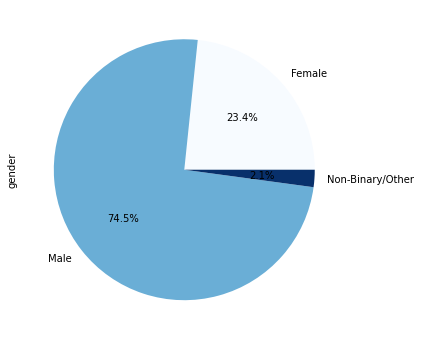

In [30]:
gender_fig = df.groupby('gender')['gender'].count().plot(kind='pie',figsize=(10,6),autopct='%1.1f%%',cmap="Blues")
gender_fig

In [31]:
df_age = df.copy()
df_age.drop(df_age[df_age.age == 3].index, inplace = True)
df_age.drop(df_age[df_age.age == 323].index, inplace = True)
df_age.drop(df_age[df_age.age == 99].index, inplace = True)
df_age.age.unique()

array([39, 29, 38, 43, 42, 30, 37, 28, 35, 52, 32, 34, 25, 26, 33, 31, 36,
       44, 40, 46, 45, 27, 41, 19, 21, 24, 17, 23, 22, 48, 55, 50, 49, 20,
       54, 47, 57, 63, 51, 61, 53, 58, 56, 15, 59, 65, 70])

<AxesSubplot:xlabel='discretized_age', ylabel='count'>

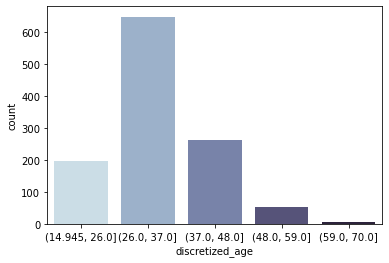

In [32]:
df_age['discretized_age']=pd.cut(df_age.age, 5)
age_fig = sns.countplot(x='discretized_age', data=df_age, palette="ch:s=.25,rot=-.25")
age_fig

<AxesSubplot:xlabel='mh_diagnos', ylabel='count'>

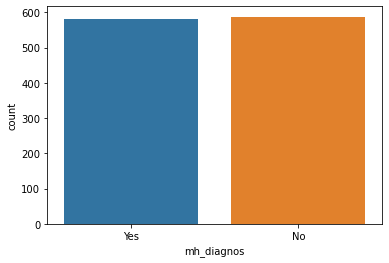

In [33]:
sns.countplot(x='mh_diagnos', data = df)

In [34]:
df['sought_mh_treat'].replace(to_replace = 0, value = 'Yes', inplace = True)
df['sought_mh_treat'].replace(to_replace = 1, value = 'No', inplace = True)

<AxesSubplot:xlabel='sought_mh_treat', ylabel='count'>

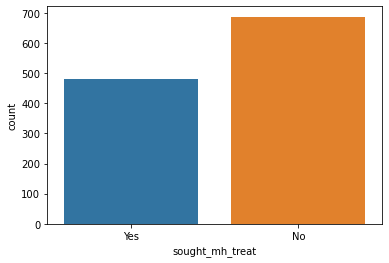

In [35]:
sns.countplot(x='sought_mh_treat', data = df)

In [36]:
country_group = df.groupby('work_country')['work_country'].count().sort_values(ascending = False)

In [37]:
df_top5_countries= df[(df.work_country == country_group.index.values[0])|(df.work_country == country_group.index.values[1])|\
        (df.work_country == country_group.index.values[2])|(df.work_country == country_group.index.values[3])|\
        (df.work_country == country_group.index.values[4])]

<AxesSubplot:xlabel='count', ylabel='work_country'>

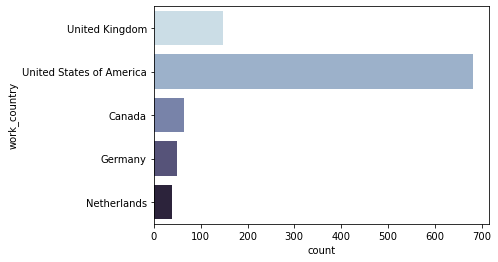

In [38]:
sns.countplot(y='work_country', data = df_top5_countries, palette="ch:s=.25,rot=-.25")

<a id='first_finding'></a>

<AxesSubplot:xlabel='sought_mh_treat', ylabel='count'>

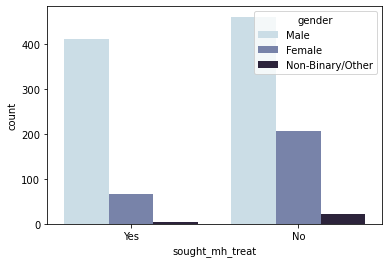

In [39]:
sns.countplot(x='sought_mh_treat', data = df, hue = 'gender',palette="ch:s=.25,rot=-.25")

In [40]:
df2 = df.copy()

#### Basic Statistical Summary Regarding Mental Health Diagnosis

In [41]:
#1, Age does not appear to be a significant factor to people experiencing mental health disorder currently:

df['current_mh_disord'] = df['current_mh_disord'].apply(lambda x: 0 if x.startswith('No') \
                            else 0.5 if 'Maybe' in x \
                            else 1)

In [42]:
df.age.mean()
df.groupby('current_mh_disord')['age'].agg(['mean','count'])

34.05218135158255

,mean,count
current_mh_disord,,
0.00,34.14,430
0.50,33.81,268
1.00,34.11,471


In [43]:
#2, Some job roles report higher chances of experiencing mental health disorders:

df.groupby('role')['current_mh_disord'].mean().sort_values(ascending=False)

role
One-person shop|Back-end Developer|Dev Evangelist/Advocate                                                                 1.00
Executive Leadership|Supervisor/Team Lead|Front-end Developer                                                              1.00
Executive Leadership|Supervisor/Team Lead|Designer                                                                         1.00
Executive Leadership|Supervisor/Team Lead|Dev Evangelist/Advocate|DevOps/SysAdmin|Back-end Developer|Front-end Developer   1.00
Supervisor/Team Lead|Back-end Developer|Designer                                                                           1.00
                                                                                                                           ... 
Other|Supervisor/Team Lead|DevOps/SysAdmin|Back-end Developer|Support                                                      0.00
One-person shop|Designer|Sales|Executive Leadership                                                

In [44]:
#3, Changing work_remote to numeric variables for regression analysis

df.work_remote.unique()

array(['Sometimes', 'Never', 'Always'], dtype=object)

In [45]:
df['work_remote'] = df['work_remote'].apply(lambda x: 0 if x.startswith('Never') \
                            else 0.5 if 'Sometimes' in x \
                            else 1)

In [46]:
df.groupby('current_mh_disord')['work_remote'].agg(['mean','sum'])

,mean,sum
current_mh_disord,,
0.00,0.54,232.00
0.50,0.55,147.50
1.00,0.54,255.00


In [47]:
df.groupby('work_remote')['current_mh_disord'].sum()

work_remote
0.00   121.00
0.50   310.50
1.00   173.50
Name: current_mh_disord, dtype: float64

In [48]:
df.head()

,gender,age,role,self_empl,work_country,state,work_remote,employee_num,mh_cov_benefits,mh_cov_awareness,mh_discuss_employ,mh_resources_employ,mh_anon,mh_medical_leave,mh_conseq,phys_conseq,mh_discuss_cowork,mh_discuss_super,mh_sameas_phys,mh_conseq_cowork,prev_employ,prev__mh_benefits,prev__mh_awareness,prev_discuss_mh,prev_mh_resources,prev_mh_anon,prev_mh_conseq,prev_phys_conseq,prev_mh_discuss_cowork,prev_mh_discuss_super,prev_mh_sameas_phys,prev_mh_conseq_cowork,ph_inter,why/why_not,mh_inter,why/why_not1,mh_hurt_career,neg_view_if_mh,share_mh_fnf,bad_resp_mh,mh_fam_history,past_mh_disord,current_mh_disord,mh_diagnos,sought_mh_treat,mh_eff_treat_work,mh_eff_not_treat_work
0,Male,39,Back-end Developer,0,United Kingdom,Unknown,0.50,26-100,Not eligible for coverage / N/A,Unknown,No,No,I don't know,Very easy,No,No,Maybe,Yes,I don't know,No,1,"No, none did",N/A (not currently aware),I don't know,None did,I don't know,Some of them,None of them,Some of my previous employers,Some of my previous employers,I don't know,None of them,Maybe,Unknown,Maybe,Unknown,Maybe,"No, I don't think they would",Somewhat open,No,No,Yes,0.00,Yes,Yes,Not applicable to me,Not applicable to me
1,Male,29,Back-end Developer|Front-end Developer,0,United States of America,Illinois,0.00,6-25,No,Yes,Yes,Yes,Yes,Somewhat easy,No,No,Maybe,Yes,Yes,No,1,"Yes, they all did",I was aware of some,None did,Some did,"Yes, always",None of them,None of them,"No, at none of my previous employers",Some of my previous employers,Some did,None of them,Maybe,It would depend on the health issue. If there ...,No,While mental health has become a more prominen...,"No, I don't think it would","No, I don't think they would",Somewhat open,No,Yes,Yes,1.00,Yes,No,Rarely,Sometimes
2,Male,38,Back-end Developer,0,United Kingdom,Unknown,1.00,6-25,No,Unknown,No,No,I don't know,Neither easy nor difficult,Maybe,No,Maybe,Maybe,I don't know,No,1,"No, none did",N/A (not currently aware),None did,Some did,I don't know,I don't know,Some of them,Some of my previous employers,I don't know,I don't know,Some of them,Yes,"They would provable need to know, to Judge if ...",Yes,"Stigma, mainly.",Maybe,Maybe,Somewhat open,Maybe/Not sure,No,Maybe,0.00,No,No,Not applicable to me,Not applicable to me
3,Male,43,Supervisor/Team Lead,1,United Kingdom,Unknown,0.50,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,1,Some did,N/A (not currently aware),None did,None did,I don't know,Some of them,Some of them,Some of my previous employers,Some of my previous employers,I don't know,Some of them,Yes,"old back injury, doesn't cause me many issues ...",Maybe,would not if I was not 100% sure that the disc...,"Yes, I think it would",Maybe,Neutral,No,No,Yes,1.00,Yes,No,Sometimes,Sometimes
4,Male,42,DevOps/SysAdmin|Support|Back-end Developer|Fro...,0,United Kingdom,Unknown,0.50,More than 1000,Yes,I am not sure,No,Yes,Yes,Somewhat easy,Yes,Yes,Maybe,Yes,No,Yes,1,"No, none did","Yes, I was aware of all of them",None did,None did,I don't know,"Yes, all of them",Some of them,"No, at none of my previous employers","No, at none of my previous employers",None did,Some of them,Yes,If it would potentially affect my ability to d...,Maybe,It would depend on the field & what I knew of ...,"Yes, I think it would",Maybe,Somewhat open,"Yes, I experienced",No,No,1.00,No,No,Not applicable to me,Often


In [49]:
#4: Changing mh_cov_benefits to numeric variables for regression analysis
# Does mental health benefits at current companies impact worker's current mental health state?

In [50]:
df.mh_cov_benefits.unique()

array(['Not eligible for coverage / N/A', 'No', 'Unknown', 'Yes',
       "I don't know"], dtype=object)

In [51]:
df['mh_cov_benefits'] = df['mh_cov_benefits'].apply(lambda x: 0 if x.startswith('No') \
                            else 0 if 'eligible' in x \
                            else 0 if 'Unknown' in x \
                            else 0.5 if 'don' in x \
                            else 1)

In [52]:
df.groupby('current_mh_disord')['mh_cov_benefits'].agg(['mean','count'])

,mean,count
current_mh_disord,,
0.00,0.42,430
0.50,0.42,268
1.00,0.50,471


In [53]:
#5: using Groupby to identify whether number of employees have an impact on current mental health level.

In [54]:
df.employee_num.unique()

array(['26-100', '6-25', 'Unknown', 'More than 1000', '100-500',
       '500-1000', '1-5'], dtype=object)

In [55]:
df['employee_num'] = df['employee_num'].apply(lambda x: 0 if x.startswith('Unknown') \
                            else 5 if '1-5' in x \
                            else 25 if '6-25' in x \
                            else 100 if '26-100' in x \
                            else 500 if '100-500' in x \
                            else 1000 if '500-1000' in x \
                            else 2000)

In [56]:
df.groupby('current_mh_disord')['employee_num'].agg(['mean','size'])

,mean,size
current_mh_disord,,
0.00,374.69,430
0.50,381.10,268
1.00,423.69,471


In [57]:
df.groupby('employee_num')['employee_num'].size()

employee_num
0       287
5        52
25      182
100     245
500     207
1000     62
2000    134
Name: employee_num, dtype: int64

In [58]:
#6: Which gender currently suffers from mental health problems more?

In [59]:
df.gender.unique()

array(['Male', 'Female', 'Non-Binary/Other'], dtype=object)

In [60]:
df['gender'] = df['gender'].apply(lambda x: 0 if x.startswith('Unknown') \
                            else 0 if 'Female' in x \
                            else 0.5 if 'Other' in x \
                            else 1)

In [61]:
df.groupby('current_mh_disord')['gender'].mean()

current_mh_disord
0.00   0.82
0.50   0.81
1.00   0.66
Name: gender, dtype: float64

In [62]:
df.groupby('gender')['current_mh_disord'].agg(['mean','size'])

,mean,size
gender,,
0.00,0.63,273
0.50,0.80,25
1.00,0.47,871


In [63]:
len(df)

1169

#### Regression model - finding correlation between controlled variables and mental health disorder

In [64]:
reg1= smf.ols('current_mh_disord ~ work_remote + age + gender + self_empl + employee_num + mh_cov_benefits', data=df)
res1 = reg1.fit()
print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:      current_mh_disord   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     9.658
Date:                Thu, 04 May 2023   Prob (F-statistic):           2.15e-10
Time:                        17:26:36   Log-Likelihood:                -666.87
No. Observations:                1169   AIC:                             1348.
Df Residuals:                    1162   BIC:                             1383.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.5684      0.051     

In [65]:
df.head()

,gender,age,role,self_empl,work_country,state,work_remote,employee_num,mh_cov_benefits,mh_cov_awareness,mh_discuss_employ,mh_resources_employ,mh_anon,mh_medical_leave,mh_conseq,phys_conseq,mh_discuss_cowork,mh_discuss_super,mh_sameas_phys,mh_conseq_cowork,prev_employ,prev__mh_benefits,prev__mh_awareness,prev_discuss_mh,prev_mh_resources,prev_mh_anon,prev_mh_conseq,prev_phys_conseq,prev_mh_discuss_cowork,prev_mh_discuss_super,prev_mh_sameas_phys,prev_mh_conseq_cowork,ph_inter,why/why_not,mh_inter,why/why_not1,mh_hurt_career,neg_view_if_mh,share_mh_fnf,bad_resp_mh,mh_fam_history,past_mh_disord,current_mh_disord,mh_diagnos,sought_mh_treat,mh_eff_treat_work,mh_eff_not_treat_work
0,1.00,39,Back-end Developer,0,United Kingdom,Unknown,0.50,100,0.00,Unknown,No,No,I don't know,Very easy,No,No,Maybe,Yes,I don't know,No,1,"No, none did",N/A (not currently aware),I don't know,None did,I don't know,Some of them,None of them,Some of my previous employers,Some of my previous employers,I don't know,None of them,Maybe,Unknown,Maybe,Unknown,Maybe,"No, I don't think they would",Somewhat open,No,No,Yes,0.00,Yes,Yes,Not applicable to me,Not applicable to me
1,1.00,29,Back-end Developer|Front-end Developer,0,United States of America,Illinois,0.00,25,0.00,Yes,Yes,Yes,Yes,Somewhat easy,No,No,Maybe,Yes,Yes,No,1,"Yes, they all did",I was aware of some,None did,Some did,"Yes, always",None of them,None of them,"No, at none of my previous employers",Some of my previous employers,Some did,None of them,Maybe,It would depend on the health issue. If there ...,No,While mental health has become a more prominen...,"No, I don't think it would","No, I don't think they would",Somewhat open,No,Yes,Yes,1.00,Yes,No,Rarely,Sometimes
2,1.00,38,Back-end Developer,0,United Kingdom,Unknown,1.00,25,0.00,Unknown,No,No,I don't know,Neither easy nor difficult,Maybe,No,Maybe,Maybe,I don't know,No,1,"No, none did",N/A (not currently aware),None did,Some did,I don't know,I don't know,Some of them,Some of my previous employers,I don't know,I don't know,Some of them,Yes,"They would provable need to know, to Judge if ...",Yes,"Stigma, mainly.",Maybe,Maybe,Somewhat open,Maybe/Not sure,No,Maybe,0.00,No,No,Not applicable to me,Not applicable to me
3,1.00,43,Supervisor/Team Lead,1,United Kingdom,Unknown,0.50,0,0.00,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,1,Some did,N/A (not currently aware),None did,None did,I don't know,Some of them,Some of them,Some of my previous employers,Some of my previous employers,I don't know,Some of them,Yes,"old back injury, doesn't cause me many issues ...",Maybe,would not if I was not 100% sure that the disc...,"Yes, I think it would",Maybe,Neutral,No,No,Yes,1.00,Yes,No,Sometimes,Sometimes
4,1.00,42,DevOps/SysAdmin|Support|Back-end Developer|Fro...,0,United Kingdom,Unknown,0.50,2000,1.00,I am not sure,No,Yes,Yes,Somewhat easy,Yes,Yes,Maybe,Yes,No,Yes,1,"No, none did","Yes, I was aware of all of them",None did,None did,I don't know,"Yes, all of them",Some of them,"No, at none of my previous employers","No, at none of my previous employers",None did,Some of them,Yes,If it would potentially affect my ability to d...,Maybe,It would depend on the field & what I knew of ...,"Yes, I think it would",Maybe,Somewhat open,"Yes, I experienced",No,No,1.00,No,No,Not applicable to me,Often


In [66]:
df2.head(1)

,gender,age,role,self_empl,work_country,state,work_remote,employee_num,mh_cov_benefits,mh_cov_awareness,mh_discuss_employ,mh_resources_employ,mh_anon,mh_medical_leave,mh_conseq,phys_conseq,mh_discuss_cowork,mh_discuss_super,mh_sameas_phys,mh_conseq_cowork,prev_employ,prev__mh_benefits,prev__mh_awareness,prev_discuss_mh,prev_mh_resources,prev_mh_anon,prev_mh_conseq,prev_phys_conseq,prev_mh_discuss_cowork,prev_mh_discuss_super,prev_mh_sameas_phys,prev_mh_conseq_cowork,ph_inter,why/why_not,mh_inter,why/why_not1,mh_hurt_career,neg_view_if_mh,share_mh_fnf,bad_resp_mh,mh_fam_history,past_mh_disord,current_mh_disord,mh_diagnos,sought_mh_treat,mh_eff_treat_work,mh_eff_not_treat_work
0,Male,39,Back-end Developer,0,United Kingdom,Unknown,Sometimes,26-100,Not eligible for coverage / N/A,Unknown,No,No,I don't know,Very easy,No,No,Maybe,Yes,I don't know,No,1,"No, none did",N/A (not currently aware),I don't know,None did,I don't know,Some of them,None of them,Some of my previous employers,Some of my previous employers,I don't know,None of them,Maybe,Unknown,Maybe,Unknown,Maybe,"No, I don't think they would",Somewhat open,No,No,Yes,No,Yes,Yes,Not applicable to me,Not applicable to me


In [67]:
df2 = pd.get_dummies(df2, columns=['gender','role', 'work_country', 'state','work_remote','employee_num',
                                   'mh_cov_benefits','mh_cov_awareness',
       'mh_discuss_employ', 'mh_resources_employ', 'mh_anon',
       'mh_medical_leave', 'mh_conseq', 'phys_conseq', 'mh_discuss_cowork',
       'mh_discuss_super', 'mh_sameas_phys', 'mh_conseq_cowork',
       'prev__mh_benefits', 'prev__mh_awareness', 'prev_discuss_mh',
       'prev_mh_resources', 'prev_mh_anon', 'prev_mh_conseq',
       'prev_phys_conseq', 'prev_mh_discuss_cowork', 'prev_mh_discuss_super',
       'prev_mh_sameas_phys', 'prev_mh_conseq_cowork', 'ph_inter',
       'why/why_not', 'mh_inter', 'why/why_not1', 'mh_hurt_career',
       'neg_view_if_mh', 'share_mh_fnf', 'bad_resp_mh', 'mh_fam_history',
       'past_mh_disord','mh_diagnos', 'sought_mh_treat',
       'mh_eff_treat_work', 'mh_eff_not_treat_work'], dummy_na=True)

In [68]:
# import more packages

import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus
from sklearn import preprocessing
from sklearn import utils

In [69]:
dt = tree.DecisionTreeClassifier(max_depth=2)

In [70]:
X = df2.drop(columns='current_mh_disord')

In [71]:
Y = df2.current_mh_disord
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(Y)

In [72]:
dt.fit(X,y_transformed)

DecisionTreeClassifier(max_depth=2)

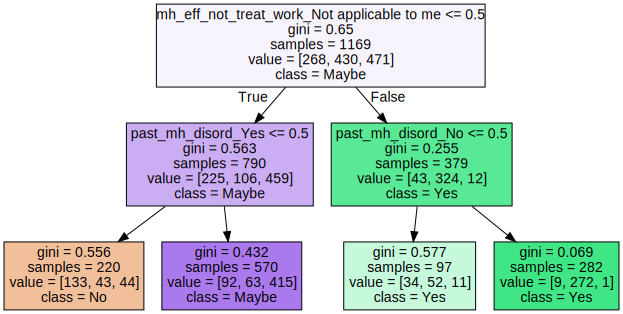

In [73]:
import graphviz
# This code will visualize a decision tree dt, trained with the attributes in X and the class labels in Y
dt_feature_names = list(X.columns)
dt_target_names = [str(s) for s in Y.unique()]
dot_data =tree.export_graphviz(dt, feature_names=dt_feature_names, class_names=dt_target_names, filled=True)  
graph = graphviz.Source(dot_data) 
graph

### **Part 4: Findings**

*1. Women and Non-Binary employees in the tech industry seek mental health treatment the least in comparison to Males.*

[First_Finding](#first_finding)

**Managerial Insights:** 
- In order to reduce the gender gap, tech companies can develop mental health organizations dedicated to Female and Non-Binary employees in order to nurture a hospitable environment in which they are free to speak openly about their issues and encourage them to seek treatment if needed. 

*2. Gender, self-employment, and company mental health coverage benefits are all significantly correlated with mental health outcome, while other variables such as remote work, age, and company size do not impact employees' mental health overall according to the regression model.* 


In [74]:
print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:      current_mh_disord   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     9.658
Date:                Thu, 04 May 2023   Prob (F-statistic):           2.15e-10
Time:                        17:26:37   Log-Likelihood:                -666.87
No. Observations:                1169   AIC:                             1348.
Df Residuals:                    1162   BIC:                             1383.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.5684      0.051     

**Managerial Insights:** 
- Tech companies can help reduce employees' mental health disorders by providing free mental health coverage benefits.

3. Employees in the tech industry who’s had mental health issues in the past and were treated effectively no longer have current mental health disorders.

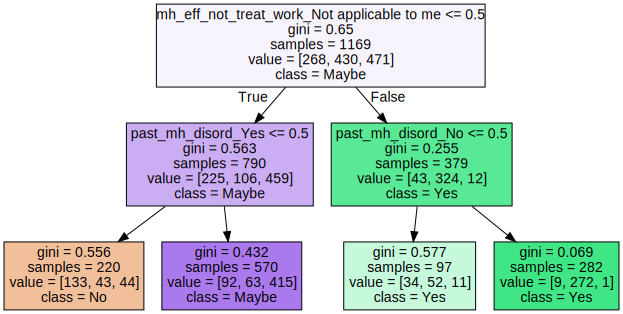

In [75]:
graph

**Managerial Insights:** 
- Since mental health treatment is highly effective, tech companies should increase employee awareness of mental health services by hiring mental health specialists to host seminars every 3 months and healing circles.

### **Part 5: Conclusion**

In conclusion, tech companies should recognize the importance of strong mental health and allocate mental health resources and benefits, host events for employee connection such as healing circles and camps, and provide paid time off.